# Graph Theory Quiz 2

Hilario, Franniel Luigi C.

BSM CS 3A

March 15, 2025

### Problem 1
The city planning department is designing a new public transportation system
connecting the major districts. To minimize costs while ensuring all districts are accessible,
they need to create a tree-like route structure with the minimum number of transit lines.
After analyzing population density and travel patterns, the urban planning AI has
determined that the optimal transit network can be represented by the Prufer sequence
[2,1,1,3,5,5].
1. Determine which pairs of districts should be connected with direct transit lines.
2. How many total transit lines are required to connect all the districts?
3. Which district/s serve as the center of the transportation hub?
4. If district 4 experiences unexpected population growth and needs a direct connection
to district 1 instead of its current connection, what will be the Prufer sequence for the
new transit network?


In [81]:
import networkx as nx
import matplotlib.pyplot as plt

def printTreeEdges(prufer, m):
    vertices = m + 2 
    vertex_set = [0] * vertices

    for i in range(vertices - 2):
        vertex_set[prufer[i] - 1] += 1
    
    print("Edges:")
    j = 0
    for i in range(vertices - 2):
        for j in range(vertices):
            if vertex_set[j] == 0:
                vertex_set[j] = -1
                print("(", (j + 1), ", ", prufer[i], ")", sep="" , end="")
                vertex_set[prufer[i] - 1] -= 1
                break
    j = 0
    for i in range(vertices):
        if vertex_set[i] == 0 and j == 0:
            j += 1
            print("(", (i + 1), ", ", sep="", end="")
        elif vertex_set[i] == 0 and j == 1:
            print((i + 1), ")")

prufer = [2,1,1,3,5,5]
m = len(prufer)
printTreeEdges(prufer, m)

Edges:
(4, 2)(2, 1)(6, 1)(1, 3)(3, 5)(7, 5)(5, 8 )


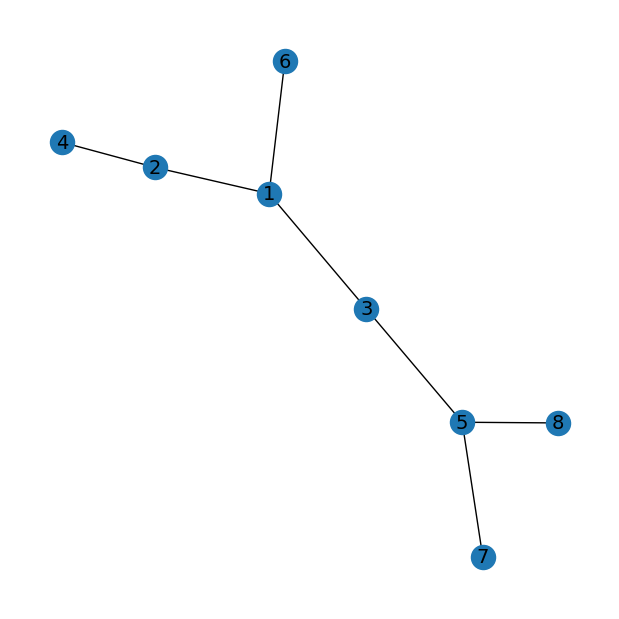

In [82]:
edges = [(4, 2), (2, 1), (6, 1), (1, 3), (3, 5), (7, 5), (5, 8)] 

G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, font_size=14)
plt.show()


### Problem 2
The following network represents the footpaths around BulSU main campus.
There are 10 lamp posts at A, B, . . . , J. The numbers on each edge represent the distances,
in meters, between lamp posts. The lamp posts are to be connected using cabling that
follows the given footpaths.

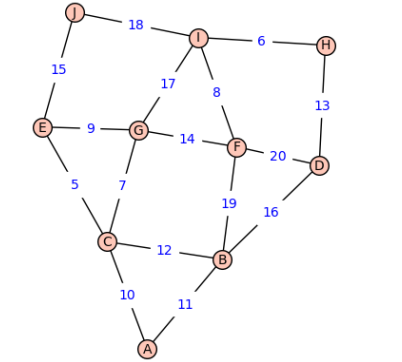

5. Use Prim’s algorithm to find the number of edges for the minimum spanning tree of
the network.
6. What is the minimum length of cabling required to connect all of the lamp posts?


In [83]:
edges = [
    ('A', 'C', 10),
    ('A', 'B', 11),
    ('B', 'C', 12),
    ('B', 'D', 16),
    ('B', 'F', 19),
    ('C', 'E', 5),
    ('C', 'G', 7),
    ('D', 'F', 20),
    ('D', 'H', 13),
    ('E', 'G', 9),
    ('E', 'J', 15),
    ('F', 'G', 14),
    ('G', 'I', 17),
    ('H', 'I', 6),
    ('I', 'J', 18),
    ('I', 'F', 8)
]


In [84]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def prim_mst(edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    
    start_node = list(G.nodes)[0] 
    mst = []
    total_cable = 0
    
    visited = set([start_node])
    edges_heap = [(weight, start_node, v) for u, v, weight in G.edges(start_node, data='weight')]
    heapq.heapify(edges_heap)
    
    while edges_heap:
        weight, u, v = heapq.heappop(edges_heap)
        if v not in visited:
            visited.add(v)
            mst.append((u, v, weight))
            total_cable += weight
            
            for _, neighbor, w in G.edges(v, data='weight'):
                if neighbor not in visited:
                    heapq.heappush(edges_heap, (w, v, neighbor))
    
    return mst, total_cable

mst, total_cable = prim_mst(edges)

print("Minimum Spanning Tree Edges:")
for edge in mst:
    print(edge)
print(f"Number of edges in MST: {len(mst)}")
print(f"Length of cabling required: {total_cable}")



Minimum Spanning Tree Edges:
('A', 'C', 10)
('C', 'E', 5)
('C', 'G', 7)
('A', 'B', 11)
('G', 'F', 14)
('F', 'I', 8)
('I', 'H', 6)
('H', 'D', 13)
('E', 'J', 15)
Number of edges in MST: 9
Length of cabling required: 89


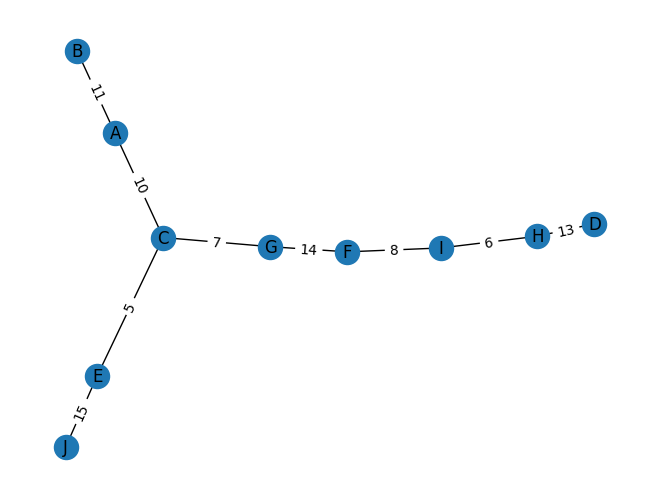

In [85]:
graph = nx.Graph()
graph.add_weighted_edges_from(mst)
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, font_size=12)
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
plt.show()

### Problem 3
The monopoly held by Villar has ended, and Primewater is no longer supplying
water to the City of Malolos. Aarhus Dela Cruz has established a new company to provide
water services to the city. To assess the costs involved in launching this project, he plans to
conduct a pilot test in selected barangays.
The table below shows the cost (in million pesos) of connecting water pipelines between
barangays:

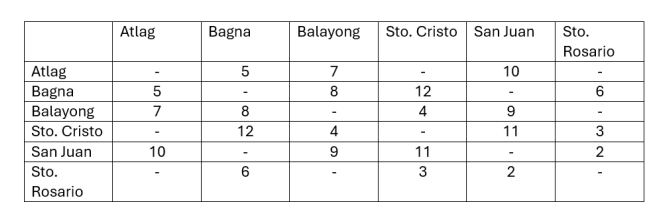

7. Using Kruskal’s algorithm, determine the edges (pair of barangays) that are selected
for the minimum spanning tree.
8. What is the minimum total cost?
9. Suppose an additional pipeline connection is proposed between Bagna and San Juan
at a cost of 4 million pesos. Would this new connection be included in the optimal
network? What is the new minimum total cost?


In [86]:
barangay_pairs = [
    ('Atlag', 'Bagna', 5),
    ('Atlag', 'Balayong', 7),
    ('Atlag', 'San Juan', 10),
    ('Bagna', 'Balayong', 8),
    ('Bagna', 'Sto Cristo', 12),
    ('Bagna', 'Sto Rosario', 6),
    ('Balayong', 'Sto Cristo', 4),
    ('Balayong', 'San Juan', 9),
    ('Sto Cristo', 'San Juan', 11),
    ('Sto Cristo', 'Sto Rosario', 3),
    ('San Juan', 'Sto Rosario', 2) 
]

In [87]:
class Graph:
    def __init__(self):
        self.graph = nx.Graph()
    
    def add_vertices(self, vertices):
        self.graph.add_nodes_from(vertices)
    
    def add_edge(self, u, v, weight):
        self.graph.add_edge(u, v, weight=weight)
    
    def vertices(self):
        return list(self.graph.nodes)
    
    def edges(self):
        return list(self.graph.edges(data=True)) 
    
def kruskal_mst(graph):
    mst = Graph()
    mst.add_vertices(graph.vertices())

    edges = sorted(graph.edges(), key=lambda x: x[2]['weight']) 
    parent = {v: v for v in graph.vertices()}

    def find(v):
        if parent[v] != v:
            parent[v] = find(parent[v])
        return parent[v]

    def union(v1, v2):
        root1 = find(v1)
        root2 = find(v2)
        if root1 != root2:
            parent[root2] = root1

    for u, v, attr in edges:
        if find(u) != find(v):
            mst.add_edge(u, v, attr['weight'])
            union(u, v)

    return mst

def draw_graph(graph, title="Graph"):
    pos = nx.spring_layout(graph.graph)  # Layout for visualization
    labels = nx.get_edge_attributes(graph.graph, 'weight')
    
    plt.figure(figsize=(8, 6))
    nx.draw(graph.graph, pos, with_labels=True, node_color="yellow", font_size=12)
    nx.draw_networkx_edge_labels(graph.graph, pos, edge_labels=labels)
    
    plt.title(title)
    plt.show()

In [88]:
G = Graph()
barangays = ['Atlag', 'Bagna', 'Balayong', 'San Juan', 'Sto Cristo', 'Sto Rosario']
G.add_vertices(barangays)

In [89]:
for u, v, w in barangay_pairs:
    G.add_edge(u, v, w)

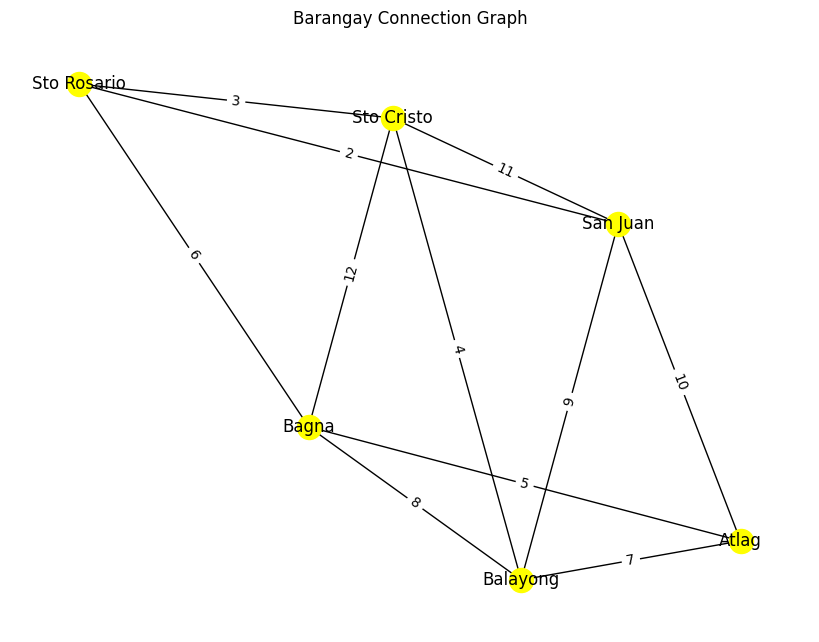

In [90]:
draw_graph(G, "Barangay Connection Graph")

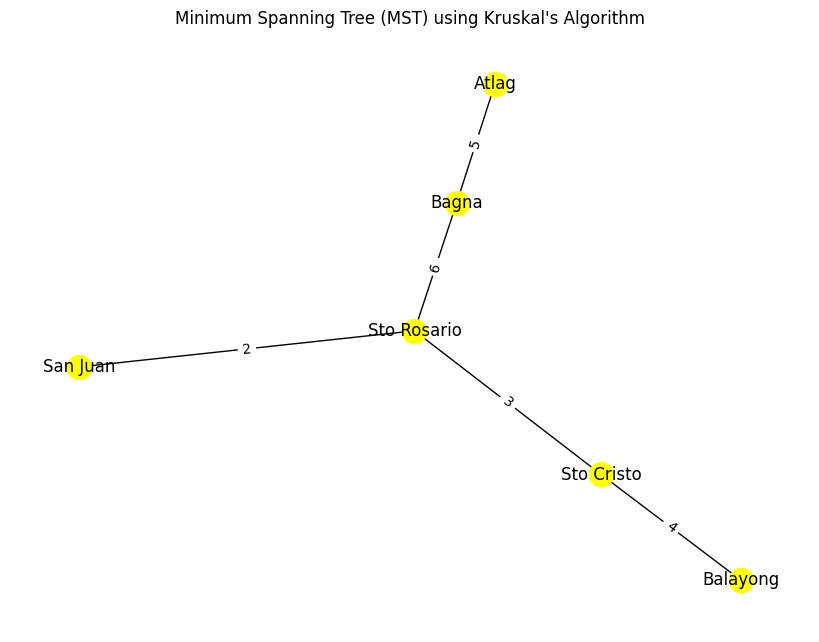

In [91]:
mst = kruskal_mst(G)
draw_graph(mst, "Minimum Spanning Tree (MST) using Kruskal's Algorithm")

In [92]:
print("Pairs of barangays in the MST:")
total_cost = 0
for u,v, w in mst.edges():
    print(f"({u}, {v}, {w['weight']})")
    total_cost += w['weight']

print(f"Minimum total cost: {total_cost}")


Pairs of barangays in the MST:
(Atlag, Bagna, 5)
(Bagna, Sto Rosario, 6)
(Balayong, Sto Cristo, 4)
(San Juan, Sto Rosario, 2)
(Sto Cristo, Sto Rosario, 3)
Minimum total cost: 20


Suppose an additional pipeline connection is proposed between Bagna and San Juan
at a cost of 4 million pesos. Would this new connection be included in the optimal
network? What is the new minimum total cost?

In [93]:
New_barangay_pairs = [
    ('Atlag', 'Bagna', 5),
    ('Atlag', 'Balayong', 7),
    ('Atlag', 'San Juan', 10),
    ('Bagna', 'Balayong', 8),
    ('Bagna', 'Sto Cristo', 12),
    ('Bagna', 'Sto Rosario', 6),
    ('Balayong', 'Sto Cristo', 4),
    ('Balayong', 'San Juan', 9),
    ('Sto Cristo', 'San Juan', 11),
    ('Sto Cristo', 'Sto Rosario', 3),
    ('San Juan', 'Sto Rosario', 2),
    ('Bagna', 'San Juan', 4) 
]

In [94]:
for u, v, w in New_barangay_pairs:
    G.add_edge(u, v, w)

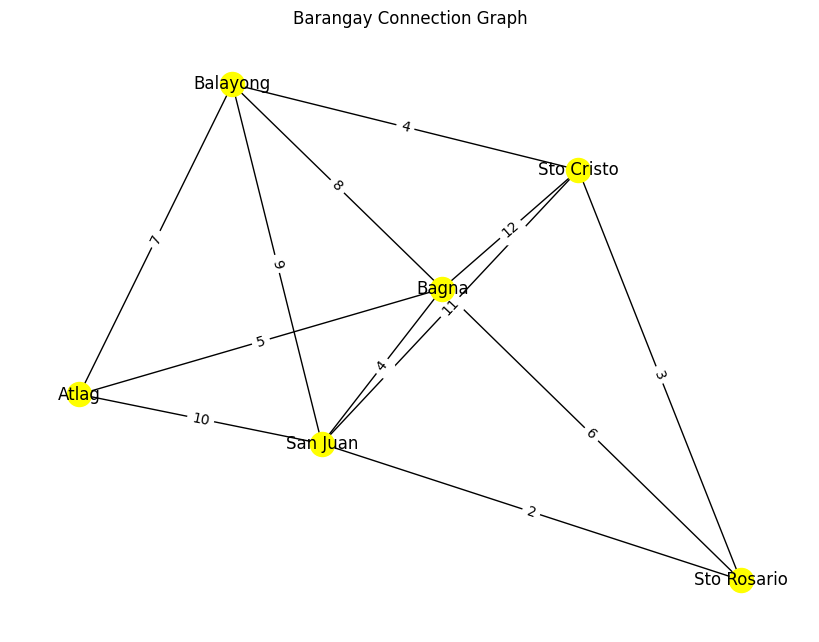

In [95]:
draw_graph(G, "Barangay Connection Graph")

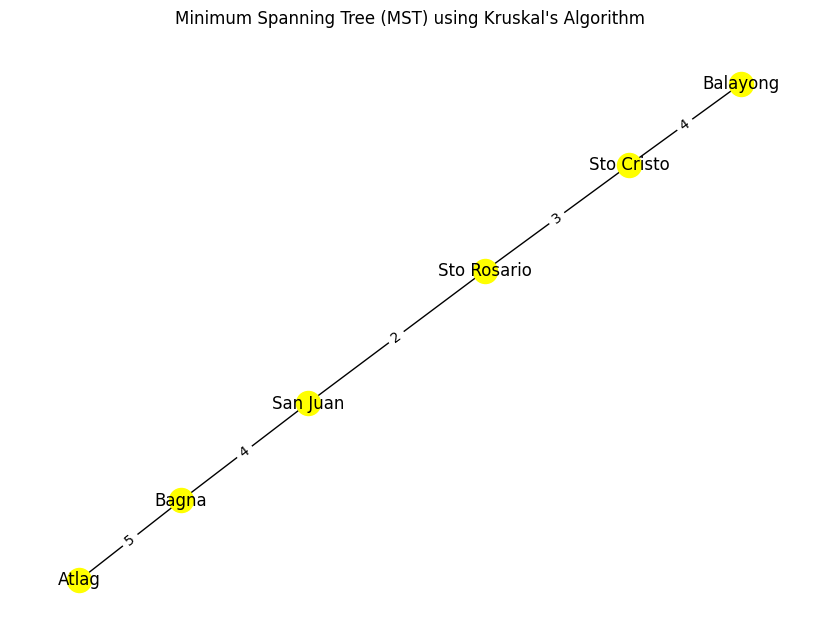

In [96]:
mst = kruskal_mst(G)
draw_graph(mst, "Minimum Spanning Tree (MST) using Kruskal's Algorithm")

In [97]:
print("Pairs of barangays in the MST:")
total_cost = 0
for u,v, w in mst.edges():
    print(f"({u}, {v}, {w['weight']})")
    total_cost += w['weight']

print(f"Minimum total cost: {total_cost}")

Pairs of barangays in the MST:
(Atlag, Bagna, 5)
(Bagna, San Juan, 4)
(Balayong, Sto Cristo, 4)
(San Juan, Sto Rosario, 2)
(Sto Cristo, Sto Rosario, 3)
Minimum total cost: 18


### Problem 4 
A logistics company, SpeedShip Express, is expanding its delivery network in
a new city. To ensure efficient delivery of packages, they need to determine the fastest route
from their central warehouse in District A to all other districts in the city.
The following table shows the travel time (in minutes) between connected districts:

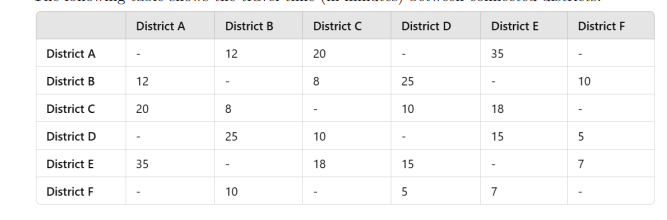

10. What is the fastest route from District A to District D? List the sequence of districts
in this path.
11. How many minutes will it take to travel from the central warehouse to District E?
12. If a new highway is built between District A and D with a travel time of 15 minutes.
How long will it takes to travel from the central warehouse to District E?


In [ ]:
travel_time = [
    ('A','B', 12),
    ('A', 'C', 20),
    ('A', 'E', 35),
    ('B', 'C', 8),
    ('B', 'D', 25),
    ('B', 'F', 10),
    ('C', 'D', 10),
    ('C', 'E', 18),
    ('D', 'E', 15),
    ('D', 'F', 5),
    ('E', 'F', 7)
]